## 宝贝回家 完整爬虫

初始化selenium

In [3]:
#selenium:3.12.0
#webdriver:2.38
#chrome.exe: 65.0.3325.181（正式版本） （32 位）

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
chrome_options = Options()
chrome_options.add_argument('--no-sandbox')#解决DevToolsActivePort文件不存在的报错

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

chrome_options.add_argument('window-size=1920x3000') #指定浏览器分辨率
chrome_options.add_argument('--disable-gpu') #谷歌文档提到需要加上这个属性来规避bug
chrome_options.add_argument('--hide-scrollbars') #隐藏滚动条, 应对一些特殊页面
chrome_options.add_argument('blink-settings=imagesEnabled=false') #不加载图片, 提升速度
#chrome_options.add_argument('--headless') #浏览器不提供可视化页面. linux下如果系统不支持可视化不加这条会启动失败
chrome_options.binary_location = r"C:\Program Files (x86)\Google\Chrome\Application\chrome.exe" #手动指定使用的浏览器位置


driver=webdriver.Chrome(chrome_options=chrome_options)

# driver.close() #切记关闭浏览器，回收资源

D:\Python\Python36\Lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: use options instead of chrome_options


## 定义保存页面的函数

In [4]:
def save_page(page_text, page_num, type_name):
    with open('save_pages_all/save_pages_{0}/{1}.txt'.format(type_name, page_num),'w',encoding='utf-8') as fp:
        fp.write(page_text)

## 开始打开首页，这里开始手动点击类型
其中类型就是这几个的拼音
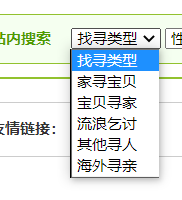

In [5]:
driver.get('https://www.baobeihuijia.com/so.aspx')

type_name = 'jiaxunbaobei'

## 手动点击完毕之后，再开始执行下面的代码

In [6]:
# 点击搜索按钮
search_button = driver.find_element_by_xpath('//*[@id="searcher"]/tbody/tr/td[4]/input[2]')
try:
    # 延迟等待
    search_button.click()
    element = WebDriverWait(driver, 60).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'HeaderStyle'))
    )
    text = driver.page_source
    save_page(text, 1, type_name)
finally:
    print('找到了')

找到了


## 定义点击下一页的函数

In [7]:
def click_next_page():
    page_text = None
    search_button = driver.find_element_by_xpath('//*[@id="GridView1_ctl33_lbNext"]')
    try:
        search_button.click()
        element = WebDriverWait(driver, 60).until(
            EC.presence_of_element_located((By.CLASS_NAME, 'HeaderStyle'))
        )
        page_text = driver.page_source
        
    finally:
        return page_text

~~如果爬到哪一页出问题了，这个函数会自动刷新~~

这段代码后来证明没啥用

## 开始爬取

如果爬取失败，请手动刷新页面，手动换到出错的那一页，然后修改begin_page和end_page的值

In [ ]:
begin_page = 0
end_page = 1541

for i in range(begin_page,end_page):
    print('\r', '{0}/{1}'.format(i,end_page), end='')
    page_text = click_next_page()
    
    if page_text == None:
        print('到了{0}页的时候坏死了'.format(i))
        break
   
    save_page(page_text, i, type_name)

In [20]:
'''
def renew_page(index):
    # 重新打开页面
    driver.get('https://www.baobeihuijia.com/so.aspx')
    try:
        search_button.click()
        element = WebDriverWait(driver, 60).until(
            EC.presence_of_element_located((By.CLASS_NAME, 'HeaderStyle'))
        )
    except:
        import traceback
        traceback.print_exc()
    print('回到页码',index)
    input_text = driver.find_element_by_xpath('//*[@id="keyword"]')
    input_text.send_keys('家寻宝贝')
    go_button = driver.find_element_by_xpath('//*[@id="searcher"]/tbody/tr/td[4]/input[2]')
    try:
        go_button.click()
        element = WebDriverWait(driver, 60).until(
            EC.presence_of_element_located((By.CLASS_NAME, 'HeaderStyle'))
        )
        page_text = driver.page_source
        
    finally:
        print('hi')
'''

'\ndef renew_page(index):\n    # 重新打开页面\n    driver.get(\'https://www.baobeihuijia.com/so.aspx\')\n    try:\n        search_button.click()\n        element = WebDriverWait(driver, 60).until(\n            EC.presence_of_element_located((By.CLASS_NAME, \'HeaderStyle\'))\n        )\n    except:\n        import traceback\n        traceback.print_exc()\n    print(\'回到页码\',index)\n    input_text = driver.find_element_by_xpath(\'//*[@id="keyword"]\')\n    input_text.send_keys(\'家寻宝贝\')\n    go_button = driver.find_element_by_xpath(\'//*[@id="searcher"]/tbody/tr/td[4]/input[2]\')\n    try:\n        go_button.click()\n        element = WebDriverWait(driver, 60).until(\n            EC.presence_of_element_located((By.CLASS_NAME, \'HeaderStyle\'))\n        )\n        page_text = driver.page_source\n        \n    finally:\n        print(\'hi\')\n'